

# Components and the Graph Laplacian

In the last lecture, we discovered that the notion of connectivity could tell us something important about graph structure.

## Components

Many networks have parts that are disconnected from each other. These parts are called **components**. As we saw in an example from the previous lecture, there is no path between any pair of nodes in different components of a network. In undirected graphs, the definition of connected components is relatively simple.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-component}

## Connected Components in an Undirected Graph

Two nodes $i$ and $j$ are **path-connected** if there exists a path between $i$ and $j$. The set $\{j \in V : i \text{ is path-connected to } j\}$ is called the **connected component** of $i$. A graph is **connected** if it has only one connected component. Otherwise, we say the network is **disconnected**. [For the purposes of this definition, we say that every node $i$ has a zero-length path to itself. It follows that a singleton (a node with no edges attached) is its own connected component.]{.aside}

:::
:::

::: {.callout-important}

## Exercise

Prove that the relation $~$ defined as $i ~ j$ iff there exists a path between $i$ and $j$ is an equivalence relation. Prove also that the equivalence classes of this relation are exactly the connected components of $G$.

:::


As we saw with degree, the definition of connected components requires a bit more subtlety when we consider directed networks.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-strongly-weakly-connected}

## Strongly and Weakly Connected Components

In a directed network, two nodes $i$ and $j$ are **strongly connected** if there exists a path from $i$ to $j$ and a path from $j$ to $i$. Nodes $i$ and $j$ are **weakly connected** if there exists either a path from $i$ to $j$ or from $j$ to $i$. [Two strongly connected nodes are also weakly connected.]{.aside}

The set $\{j \in V : i \text{ is strongly connected to } j\}$ is called the **strongly connected component** of $i$, and the set $\{j \in V : i \text{ is weakly connected to } j\}$ is called the **weakly connected component** of $i$. [Intuitively, a weakly connected component is a connected component in the undirected version of the directed graph in which we "forget" the directionality of the edges.]{.aside}

A directed graph is **strongly connected** if it has only one strongly connected component. A directed graph is **weakly connected** if it is not strongly connected and has only one weakly connected component.

:::
:::

::: {.callout-important}

## Exercise

Identify the strongly connected components and the weakly connected components in the network below.

:::

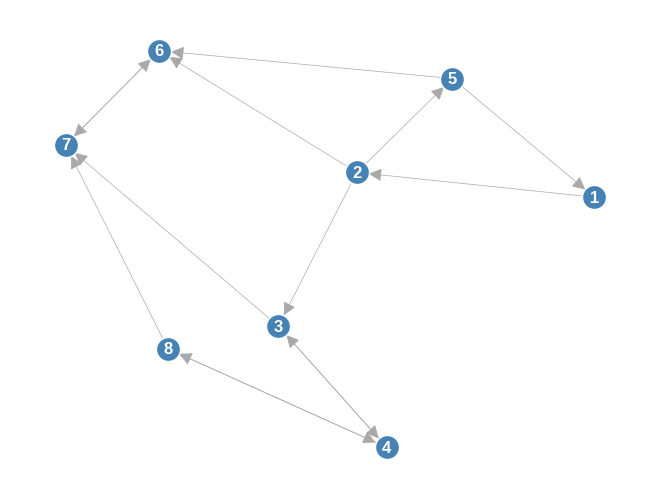

In [22]:

from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
plt.style.use('seaborn-v0_8-whitegrid')

plot_kwargs = {"node_size" : 300, "edgecolors" : 'white', "node_color" : "steelblue", "width" : 0.5, "edge_color" : "darkgrey"}

DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (2,5), (2,6), (3, 4), (3, 7), (4, 3), (4, 8), (5, 1), (5, 6), (6, 7), (7, 6), (8, 4), (8, 7)])

nx.draw(DG, with_labels = True, arrowsize = 20, font_color = 'white', font_weight = 'bold', **plot_kwargs)

::: {.hide .solution}

This network has three strongly connected components: $\{1,2,5\}, \ \{3, 4, 8\},$ and $\{6, 7\}$.

The network has only one weakly connected component (this set contains all the nodes). Thus we would say the entire network is weakly connected.

:::


In directed networks, we can also define individual node properties that describe all nodes that could reach or be reached by our node of interest.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-in-out-component}

The **in-component** of node $i$ is the set of nodes $\{j \in V : \text{ there is a directed path from } i \text{ to } j\}$.



The **out-component** of node $i$ is the set of nodes $\{j \in V : \text{ there is a directed path from } j \text{ to } i\}$

As with connected components, we include the node $i$ itself as a member of its own in- and out-components.

:::
:::

::: {.callout-important}

## Exercise

Let $C^{\mathrm{in}}(i)$ and $C^{\mathrm{out}}(i)$ be the in-component and out-component of node $i$ in a directed network. Describe the sets $C^{\mathrm{in}}(i) \cap C^{\mathrm{out}}(i)$ and $C^{\mathrm{in}}(i) \cup C^{\mathrm{out}}(i)$ in vocabulary we have previously introduced.

:::

## The Graph Laplacian

We now introduce the graph Laplacian. [There are multiple matrices that use this name; the one we introduce here is sometimes called the *combinatorial* graph Laplacian.]{.aside} The Laplacian is a matrix representation of a network that is surprisingly useful in a wide variety of applications. With our focus on components today, we'll find an especially striking property of the Laplacian: the eigenvalues of the Laplacian give us a guide to the connected component structure of a graph. [The Laplacian is also useful in studying random walks and dynamics, for clustering and data analysis, for graph visualization, partitioning, and more! ]{.aside}


::: {.callout-note icon=false appearance="minimal"}
::: {#def-laplacian}

## Laplacian of an Undirected Graph

The **(combinatorial) graph Laplacian $L$** of an undirected graph with adjacency matrix $A$ is

$$
{\bf L} = {\bf D} - {\bf A} \,
$$

where ${\bf D}$ is the diagonal matrix whose diagonal entries $D_{ii} = k_i$ contain the degree of node $i$. An individual entry of the Laplacian can be written

$$
\begin{aligned}
    L_{ij} = \delta_{ij}k_i - A_{ij} \,,
\end{aligned}
$$

where $\delta_{ij}$ is the Kronecker delta function:

$$
\begin{aligned}
    \delta_{ij} = \begin{cases} 1 & \text{if } i = j \\ 0 & \text{otherwise} \end{cases} \,.
\end{aligned}
$$

:::
:::

Let's construct an undirected graph:

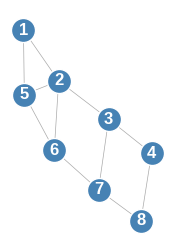

In [23]:


G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (2,5), (2,6), (3, 4), (3, 7), (4, 3), (4, 8), (5, 1), (5, 6), (6, 7), (7, 6), (8, 4), (8, 7)])

fig, ax = plt.subplots(1, 1, figsize = (2, 3))

nx.draw(G, with_labels = True, font_color = 'white', font_weight = 'bold', **plot_kwargs)

Now we'll take a look at the Laplacian matrix. [It is also possible to extract the Laplacian matrix using the NetworkX built-in `nx.laplacian_matrix(G)`.]{.aside}

In [24]:
def laplacian(G):
    A = nx.to_numpy_array(G)
    D = np.diag(np.sum(A, axis = 1))
    return D - A


We observe that the diagonal of the Laplacian gives the degrees of each node (from the matrix $\mathbf{D}$), while the off diagonal entries give the *negatives* of the entries of the adjacency matrix.

@def-laplacian  generalizes in a straightforward way for weighted networks with positive weights. There are also variants for directed graphs (including using in-degree or out-degree matrices to build an in-degree Laplacian or an out-degree Laplacian); not all of the properties we describe below hold for these variants.

### Properties of the Graph Laplacian

We now investigate the mathematical properties of the graph Laplacian. We'll leave proofs of many of these properties as exercises. Throughout, this section, let $\mathbf{L} \in \mathbb{R}^{n\times n}$ be the combinatorial Laplacian matrix of a graph $G$ on $n$ nodes, and let $\mathbf{1} \in \mathbb{R}^n$ be the vector of ones.

::: {.callout-tip icon=false collapse=true}
::: {#thm-laplacian}

## Elementary Properties of the Graph Laplacian

- ${\bf L}$ is real and symmetric.
- The eigenvalues of $\mathbf{L}$ are all real.
- ${\bf L}{\bf 1} = {\bf 0}.$ That is, every row sums to 0.

:::
:::

Another important property of the Laplacian is that it is *positive semi-definite*.  

::: {.callout-tip icon=false collapse=true}
::: {#thm-laplacian-psd}

## Positive-semidefiniteness of the Laplacian

For any $\mathbf{x} \in \mathbb{R}^n$, it holds that $\mathbf{x}^T\mathbf{Lx} \geq 0$.

:::
:::

Because the Laplacian is symmetric, this is equivalent to:

::: {.callout-tip icon=false collapse=true}
::: {#thm-laplacian-psd-eigs}

## The Laplacian has nonnegative eigenvalues

If $\lambda$ is an eigenvalue of the Laplacian $\mathbf{L}$, then $\lambda \geq 0$.

:::
:::


Can we get more specific about the spectral structure of the eigenvalues? In fact, we already have one important piece of information:

::: {.callout-tip icon=false collapse=true}
::: {#thm-laplacian-0-eigenvalue}

## 0 is an Eigenvalue of the Graph Laplacian

The Laplacian always has at least one zero eigenvalue with corresponding eigenvector ${\bf 1}.$ [A corollary of this fact is that the Laplacian is not invertible.]{.aside}

:::
:::

Furthermore, the *multiplicity* of the zero eigenvalue gives us information about the number of connected components in the network:


::: {.callout-tip icon=false collapse=true}
::: {#thm-laplacian-0-multiplicity}

## Multiplicity of the 0 Eigenvalue Counts Connected Components

- Graph $G$ has $c$ components if and only if its graph Laplacian has exactly $c$ zero eigenvalues (that is, the eigenvalue $\lambda = 0$ has algebraic multiplicity $c$.)

:::
:::


Here's an example of applying this theorem: we'll construct a graph with 3 connected components and show that the Laplacian has 3 zero eigenvalues.

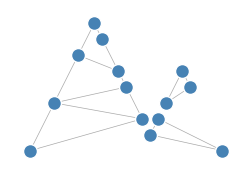

In [25]:

fig, ax = plt.subplots(1, 1, figsize = (3, 2))
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (2,5), (2,6), (3, 4), (3, 7), (4, 3), (4, 8), (5, 1), (5, 6), (6, 7), (7, 6), (8, 4), (8, 7), (9, 10), (10, 11), (11, 9), (12, 13), (13, 14), (14, 12)])

pos = nx.planar_layout(G)

plot_kwargs.update({"node_size" : 100})

nx.draw(G,pos, ax = ax, **plot_kwargs)

Now we can check that there are exactly 3 zero eigenvalues.

In [27]:

L = laplacian(G)
eigvals, eigvecs = np.linalg.eig(L)
eigvals

# count close to 0 eigvals
num_zero_eigvals = np.sum(np.isclose(eigvals, 0))
print(f"There are {num_zero_eigvals} zero eigenvalues.")

There are 3 zero eigenvalues.


In a graph with just one connected component, @thm-laplacian-0-multiplicity implies that there is exactly one zero eigenvalue of $\mathbf{L}$. It turns out that if the graph is "almost disconnected" into two components, then the second-smallest eigenvalue of the Laplacian will be "almost 0". This is part of the motivation behind Laplacian spectral clustering, an algorithm which [we'll see later on](chapters/19-spectral-clustering.qmd). [This kind of structure is often called *community structure* and we will study it much more later in the course.]{.aside} Here's an example of such a graph, which we've plotted alongside the eigenvalues of the Laplacian:

[Text(0.5, 0, 'Eigenvalue index'), Text(0, 0.5, 'Eigenvalue of Laplacian')]

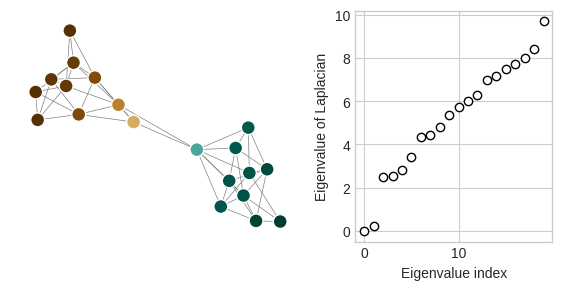

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (7, 3), gridspec_kw={'width_ratios': [1.5, 1]})

G = nx.stochastic_block_model([10, 10], [[0.5, 0.02], [0.02, 0.5]], seed = 1234)

pos = nx.spring_layout(G, seed = 1234)

L = laplacian(G)
eigvals, eigvecs = np.linalg.eig(L)
# eigvecs[:,1]

nx.draw(G, pos, ax = ax[0], node_color = eigvecs[:,1], node_size = 100, cmap = "BrBG", edge_color = 'gray', width = 0.5, edgecolors = "white")

ax[1].scatter(np.arange(len(eigvals)), np.sort(eigvals), facecolor = 'white', edgecolor = 'black')

ax[1].set(xlabel = "Eigenvalue index", ylabel = "Eigenvalue of Laplacian")

The eigenvalue on the very far left is the zero eigenvalue guaranteed for any graph, while the very small eigenvalue right next to it reflects the structure of the graph as "almost disconnected" into two components.


### The Graph Laplacian as a Smoothness Measure

Suppose that we have a vector $\mathbf{x} \in \mathbb{R}^n$, where we interpret entry $x_i$ as describing some quantity at node $i$. The Laplacian matrix can be used to measure the "smoothness" of this vector on the graph, by which we mean the extent to which neighboring nodes have similar values of $x$. One way to quantify this is using the measure

$$
\begin{aligned}
    S(\mathbf{x}) = \frac{1}{2}\sum_{i = 1}^n \sum_{j = 1}^n A_{ij}(x_i - x_j)^2 \,.
\end{aligned}
$$

The term corresponding to $i$ and $j$ in $S(\mathbf{x})$ is zero if either $A_{ij} = 0$ (i.e. node $i$ is not connected to node $j$) or if $x_i = x_j$ (i.e. nodes $i$ and $j$ have the same values in their corresponding entries of $\mathbf{x}$). So, intuitively, $S(\mathbf{x})$ is small when connected nodes have similar entries in $\mathbf{x}$ and large when connected nodes have very different entries in $\mathbf{x}$. The Laplacian can be used to concisely represent the smoothness measure $S(\mathbf{x})$:

$$
\begin{aligned}
    S(\mathbf{x}) &= \frac{1}{2}\sum_{i = 1}^n \sum_{j = 1}^n A_{ij}(x_i - x_j)^2 \\
    &= \frac{1}{2} \sum_{i = 1}^n \sum_{j = 1}^n A_{ij}(x_i^2 - 2x_ix_j + x_j^2) \\
    &= \frac{1}{2} \sum_{i = 1}^n \sum_{j = 1}^n A_{ij}x_i^2 - \sum_{i = 1}^n \sum_{j = 1}^n A_{ij}x_ix_j + \frac{1}{2}\sum_{i = 1}^n \sum_{j = 1}^n A_{ij}x_j^2 \\
    &= \frac{1}{2} \sum_{i = 1}^n k_i x_i^2 - \sum_{i = 1}^n \sum_{j = 1}^n A_{ij}x_ix_j + \frac{1}{2} \sum_{j = 1}^n k_j x_j^2
\end{aligned}
$$

In the last line, we've used the definition of the degree: $k_i = \sum_{j = 1}^n A_{ij}$. Now we need to use an indexing trick. Let $\delta_{ij}$ be the Kronecker delta, which is 1 if $i = j$ and 0 otherwise. Then, we can write

$$
\begin{aligned}
    \frac{1}{2} \sum_{i = 1}^n k_i x_i^2 + \frac{1}{2} \sum_{j = 1}^n k_j x_j^2 = \sum_{i = 1}^n\sum_{j = 1}^n \delta_{ij} k_i  x_i x_j\;,
\end{aligned}
$$

which allows us to write our entire smoothness measure as

$$
\begin{aligned}
    S(\mathbf{x}) &= \sum_{i = 1}^n\sum_{j = 1}^n \left(\delta_{ij} k_i   - A_{ij}\right)x_ix_j \\
    &= \sum_{i = 1}^n\sum_{j = 1}^n L_{ij}x_ix_j \\
    &= \mathbf{x}^T\mathbf{Lx} \,.
\end{aligned}
$$


So, our smoothness measure is the quadratic form $\mathbf{x}^T\mathbf{Lx}$. The role of the Laplacian in measuring the smoothness of functions defined on graphs is another perspective on its use in both algorithms and modeling of dynamical systems.

To operationalize this, let's implement a smoothness score:

In [29]:
def smoothness(G, x):
    L = laplacian(G)
    return x@L@x

Now we can compare the smoothness of a random vector with the smoothness of a vector that varies in a more continuous fashion across the graph. [I've obtained the smooth vector as the eigenvector corresponding to the second-smallest eigenvalue (as in the example above), but this isn't important in this context; it's just one convenient way to get a smooth vector.]{.alert}

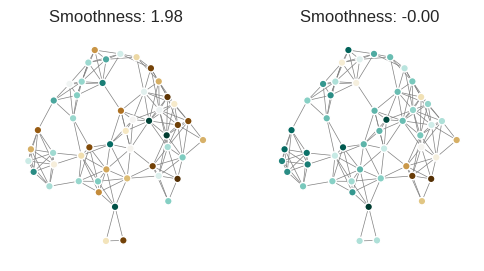

In [30]:
G = nx.random_geometric_graph(50, 0.25, seed = 1234)
pos = nx.kamada_kawai_layout(G)

n = G.number_of_nodes()
fig, ax = plt.subplots(1, 2, figsize = (6, 3))

# nonsmooth version, normalized
x_random = np.random.rand(n)
x_random = x_random / np.linalg.norm(x_random)

nx.draw(G, pos, node_color = x_random, ax = ax[0], node_size = 30, edge_color = "grey", edgecolors = "white", width = 0.5, cmap = "BrBG")
ax[0].set_title(f"Smoothness: {smoothness(G, x_random):.2f}")

# smooth version, normalized
L = laplacian(G)
x_smooth = np.linalg.eig(L)[1][:,1]
x_smooth = x_smooth / np.linalg.norm(x_smooth)

nx.draw(G, pos, node_color = x_smooth, ax = ax[1], node_size = 30, edge_color = "grey", edgecolors = "white", width = 0.5, cmap = "BrBG")

title = ax[1].set_title(f"Smoothness: {smoothness(G, x_smooth):.2f}")

Indeed, the vector which varies more smoothly across the graph (with fewer large large "jumps" along edges) has a much smaller smoothness score.



### The Graph Laplacian as a Diffusion Operator

One of the many important properties of the graph Laplacian is that it describes many *spreading* or *diffusion* processes that take place on networks. Here's an example: suppose that we "heat up" a single node on the network, and then allow heat to flow along the network edges. The Laplacian matrix gives a concise description of how this heat spreads over the network. Let $\mathbf{x} \in \mathbb{R}^n$ be the vector whose $i$th entry gives the amount of heat currently on node $i$. Then, the vector $\delta \mathbf{x} = -\mathbf{Lx}$ is proportional to rate of change of heat at each node. If we imagine that heat moves in discrete time, our update would be [One perspective on this update is that it is the gradient flow associated with minimization of the smoothness measure $S(\mathbf{x})$ from the previous section.]{.aside}

$$
\begin{aligned}
\mathbf{x} \gets \mathbf{x} -\alpha\mathbf{Lx} \,,
\end{aligned}
$$

where $\alpha$ is some constant that describes the rate of heat transfer. Let's see how this looks:

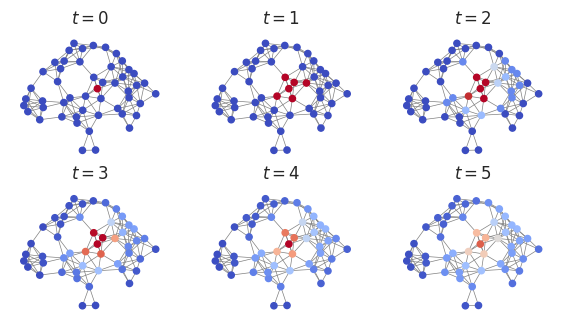

In [31]:

from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

fig, axarr = plt.subplots(2, 3, figsize = (7, 3.7))

# create a network for visualization and set up a layout
n = 50
rad = 0.25
G = nx.random_geometric_graph(n, rad, seed = 1234)

layout = nx.kamada_kawai_layout(G)

# construct the Laplacian matrix
A = nx.to_numpy_array(G)
D = np.diag(np.sum(A, axis = 1))
L = D - A

# rate of heat transfer
rate = 0.12

# initial condition: all heat on a single node
x = np.zeros(n)
x[20] = 10

# main loop
for i, ax in enumerate(axarr.flatten()):
    nx.draw(G, ax = ax, node_size = 20, edge_color = 'gray', node_color = x, width = 0.5, pos = layout, cmap = "coolwarm", vmin = 0, vmax = 1)
    ax.set_title("$t = " + str(i) + "$")

    # Laplacian dynamical update
    x -= rate*L@x

The Laplacian operator also has many other applications in network science, many of which we will study later in these notes.
